# **<center>Modelling** 

In [22]:
import os
from dotenv import load_dotenv
# Resolve an error that I had with Cuda
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.multiprocessing as mp

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm

plt.style.use('dark_background')


In [5]:
# Show all the columns in the .head() method
pd.set_option('display.max_columns', None)

In [6]:
# Load in the dotenv variables
load_dotenv()

# Get the the path variable from dotenv
project_path = os.getenv('Project_Path')[2:78]

# Change notebook directory back one so that it can acess the data
os.chdir(project_path)

In [17]:
data = pd.read_csv('./data/processed/train.csv')

In [18]:
data.shape

(255720, 62)

In [19]:
data.head()

,loan_amnt,term,grade,annual_inc,pymnt_plan,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,dti_joint,tot_cur_bal,open_acc_6m,il_util,max_bal_bc,inq_last_12m,emp_type_Accountant,emp_type_Admin,emp_type_Analyst,emp_type_Assistant,emp_type_Clergy,emp_type_Clerk,emp_type_Designer,emp_type_Director,emp_type_Education,emp_type_Executive,emp_type_Healer,emp_type_Manager,emp_type_Operator,emp_type_Technical,emp_type_Vol,home_ownership_OTHER,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_major_purchase,purpose_other,purpose_small_business,purpose_wedding,addr_state_AL,addr_state_CO,addr_state_DC,addr_state_FL,addr_state_IL,addr_state_KS,addr_state_ME,addr_state_MS,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NV,addr_state_NY,addr_state_SC,addr_state_TX,addr_state_VA,frac
0,-1.156460,-0.654724,0.763889,-0.789014,-0.003357,0.305877,-0.335522,-0.145932,1.201140,-1.373775,-0.97077,-0.415561,0.302329,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,-0.768632,1.431317,1.817653,-0.140912,-0.225373,-0.108777,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,1.171905
1,-1.452829,1.527360,-0.314193,-0.696292,-0.003357,4.312132,-0.335522,-0.679268,-1.912396,-1.796028,-0.97077,-0.426398,-3.540893,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,1.301013,-0.698657,-0.550160,-0.140912,-0.225373,-0.108777,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,0.403643
2,-1.464683,-0.654724,-0.468204,-0.970563,-0.003357,1.307441,-0.335522,-0.622684,1.821333,-1.289324,-0.97077,-0.315809,0.302329,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,-0.768632,-0.698657,-0.550160,-0.140912,-0.225373,9.193151,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,4.900357,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,1.250750
3,-0.563724,-0.654724,0.147842,-0.399582,-0.003357,0.305877,-0.335522,-0.504878,-1.426299,0.990842,-0.97077,-0.376798,-1.344122,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,1.301013,-0.698657,-0.550160,-0.140912,4.437084,-0.108777,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,1.222458
4,-1.156460,-0.654724,1.225924,-0.603570,-0.003357,2.309004,-0.335522,-0.399424,-1.120393,-1.120423,-0.97077,-0.417770,-0.247992,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,1.301013,-0.698657,-0.550160,-0.140912,-0.225373,-0.108777,19.418825,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0

In [20]:
data['frac'].describe()

count    255720.000000
mean          1.014842
std           0.297824
min           0.000000
25%           1.031176
50%           1.102847
75%           1.175711
max           1.763947
Name: frac, dtype: float64

In [24]:
X = data.drop('frac', axis = 1)
y = data['frac']

In [28]:
X.shape

(255720, 61)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

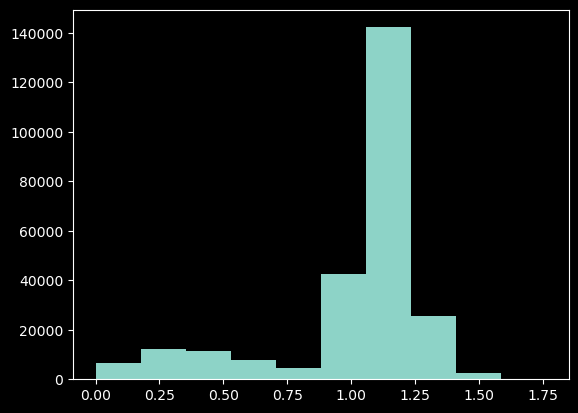

In [23]:
plt.hist(data = data, x = 'frac');

In [8]:
# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the GPU
    print("GPU is available")
else:
    device = torch.device("cpu")  # Use the CPU
    print("GPU is not available, using CPU")

GPU is available


In [9]:
# Set the GPU through the name cuda
torch.device("cuda")

device(type='cuda')

In [38]:
# Create a fit function that takes the X-train, y-train, epochs and Batch Size and fits the model
def train_model(X_train, y_train, epochs, batch_sizes, net):
    y_train = np.array(y_train).reshape(-1,1)

    # Create an instance of the model with the correct input_dim
    model = net(X_train.shape[1])

    # Check if the GPU is available and save it to device. If not use the cpu
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Move the model over to the device that is available
    model.to(device)

    # Define the loss function
    criterion = nn.MSELoss()

    # Define the optimizer
    optimizer = optim.Adam(model.parameters())

    X_train_tensor = torch.Tensor(X_train.values).float().to(device)
    y_train_tensor = torch.Tensor(y_train).float().to(device)

    # Training loop
    num_epochs = epochs
    batch_size = batch_sizes
    global losses
    losses = []
    for epoch in range(num_epochs):
        # Shuffle the data at the start of each epoch
        indices = np.random.permutation(len(X_train_tensor))
        shuffled_X = X_train_tensor[indices]
        shuffled_y = y_train_tensor[indices]
        
        # Set the model to training mode
        model.train()

        # Mini-batch training
        for i in range(0, len(X_train_tensor), batch_size):

            batch_X = shuffled_X[i:i+batch_size]
            batch_y = shuffled_y[i:i+batch_size]

            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print loss and accuracy
            print(f'\rEpoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train_tensor)}], Loss: {loss.item():.4f}', end = '\r')
        
        losses.append(loss.item()) # type: ignore
    
    return model

In [11]:
# Create a function that takes in the loss from the train_model as an argument
def loss_plot(loss, param_k = False, ticks_k = False):
    if ticks_k == False:
        # Create a plot of the the epics and the losses for each epoch
        plt.plot(range(1,len(loss) + 1), loss);
        # Match the ticks to the epochs
        plt.xticks(np.arange(1, len(loss) + 1));
    else:
        # Create a plot of the the epics and the losses for each epoch
        plt.plot(range(ticks_k[0], ticks_k[1]), loss); # type: ignore
        # Match the ticks to the epochs
        plt.xticks(np.arange(ticks_k[0], ticks_k[1] + 1)); # type: ignore
    if param_k == False:
        # Label the x-axis of the graph
        plt.xlabel("Epoch #");
    else:
        # Label the x-axis of the graph
        plt.xlabel("K - Value");
    # Label the y-axis of the graph
    plt.ylabel("Cost");
    # Title the graph
    plt.title("Model Cost");

In [60]:
# Create a function to evaluate the model
def eval_model(X_test, y_test, model):
    # Set the model to evaluation mode
    model.eval()

    # Move the model and data back to the CPU
    model.to("cpu")
    X_test_tensor = torch.Tensor(X_test.values).float()

    # Make Preds a global variable for the roc graph
    global preds
    # Perform predictions on the test set
    with torch.no_grad():
        preds = model(X_test_tensor)

    # Convert the predictions tensor to a numpy array
    preds = preds.numpy()

    # Calculate the rootmean square
    plt.figure(figsize = (20,8))
    plt.scatter(range(len(preds)), preds - y_test, s = .01, c = 'red')


In [29]:
# Define the model class Net from the parent class nn.Module
class Net(nn.Module):
    # Initialize the class with 
    def __init__(self, input_dim):
        # Initialize nn.Module with super
        super(Net, self).__init__()
        # Create the first layer of the neural net
        self.fc1 = nn.Linear(input_dim, 61)
        # Create the middle layers of the network with 12 nodes that connect to 12 nodes
        self.fc2 = nn.Linear(61, 61)
        self.fc3 = nn.Linear(61, 61)
        self.fc4 = nn.Linear(61, 61)
        self.fc5 = nn.Linear(61, 61)
        self.fc6 = nn.Linear(61, 61)
        self.fc7 = nn.Linear(61, 61)
        self.fc8 = nn.Linear(61, 53)
        self.fc9 = nn.Linear(53, 38)
        self.fc10 = nn.Linear(38, 25)
        self.fc11 = nn.Linear(25, 14)
        # Create a layer that has 12 nodes that connect to 8 nodes
        self.fc12 = nn.Linear(14, 8)
        # Create the last layer that takes 8 nodes and compresses it down to 1
        self.fc13 = nn.Linear(8, 1)
        self.activation = nn.ReLU()

    # Define a method for the forward propagation of the model
    def forward(self, x):
        # Create the connections 
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.activation(self.fc6(x))
        x = self.activation(self.fc7(x))
        x = self.activation(self.fc8(x))
        x = self.activation(self.fc9(x))
        x = self.activation(self.fc10(x))
        x = self.activation(self.fc11(x))
        x = self.activation(self.fc12(x))
        x = self.activation(self.fc13(x))
        return x

In [46]:
bignet = train_model(X_train, y_train, epochs = 38, batch_sizes = 1000, net = Net)

In [61]:
eval_model(X_test, y_test, bignet)

KeyboardInterrupt: 

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Initialize a random forest model
rf = RandomForestClassifier(n_jobs = 4)
# Create a set of values to search
param_grid = {'n_estimators': [5, 50, 100, 150, 200, 300, 600]}  
# Create the grid search object with 5 cross validational folds
grid_search = GridSearchCV(rf, param_grid, cv = 2, verbose = 1)  
# Fit the data to the grid search
grid_search.fit(X, y_train)
# Save the best parameters  
best_params = grid_search.best_params_
# Print the best parameters
best_params